In [10]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.table import Table
%matplotlib inline

In [11]:
#define TARGET_TYPE_SCIENCE 1
#define TARGET_TYPE_STANDARD 2
#define TARGET_TYPE_SKY 4
#define TARGET_TYPE_SAFE 8
#define TARGET_TYPE_SUPPSKY 16


In [16]:
def plot_sky(path_master, target_type=4, n_tt=400):
    ttype = {4:"SKY", 1:"SCIENCE", 2:"STANDARD"}
    master_files = glob.glob(path_master+"fba-*.fits")
    master_files.sort()
    print(len(master_files))
    n_tiles = 0
    plt.figure(figsize=(6,5))
    for f in master_files[:700]:
        data = Table.read(f, hdu=1)
        ii = ((data['FA_TYPE']&target_type)!=0) & (data['DEVICE_TYPE']=='POS')
        n_sky = np.count_nonzero(ii)
        #print(n_sky)
        if n_sky==n_tt:
            n_tiles += 1
            plt.scatter(data['FIBERASSIGN_X'][ii], data['FIBERASSIGN_Y'][ii], color='black', s=0.1, alpha=0.1)
    
    print(n_tiles)
    plt.xlim([-400,400])
    plt.ylim([-400,400])
    plt.axis("equal")
    plt.xlabel("X [mm]")
    plt.ylabel("Y [mm]")
    plt.title("{} . {} tiles included.".format(ttype[target_type], n_tiles))
    plt.savefig("{}_pattern.jpg".format(ttype[target_type]))

6905
698


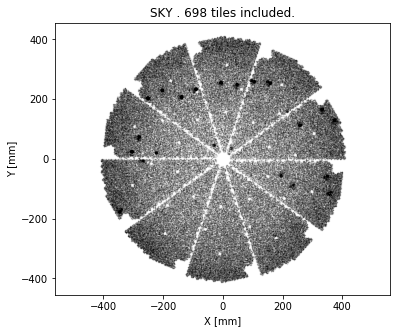

In [17]:
plot_sky("/global/cscratch1/sd/forero/SandboxDESI/DR8/fba_dark_gray_north_2019/", target_type=4, n_tt=400)

6905
685


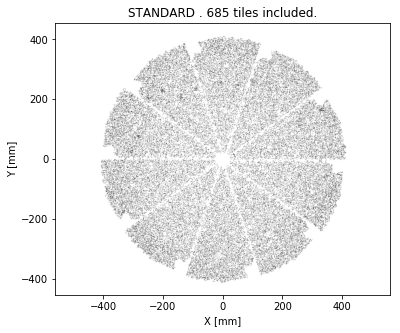

In [18]:
plot_sky("/global/cscratch1/sd/forero/SandboxDESI/DR8/fba_dark_gray_north_2019/", target_type=2, n_tt=100)